In [1]:
import os
import predict
import importlib
import tensorflow as tf
from openbabel import pybel
from glob import glob

In [2]:
core_dirs = glob(os.path.join('..','CASF-2016','CASF-2016','coreset','*'))
core_dirs.sort()
core_id = [os.path.split(i)[-1] for i in core_dirs]
affinity ={}
with open('../INDEX_general_PL_data.2019','r') as f:
    for line in f.readlines():
        if line[0] != '#':
            affinity[line.split()[0]] = line.split()[3]
with open('core_affinity.csv', 'w') as f1:
    f1.write('pdbid\taffinity\n')
    for pdbid in core_id:
        f1.write(pdbid+'\t'+affinity[pdbid]+'\n')  

In [5]:
model = predict.build_model()
with open('evaluation_docking.csv', 'w') as f1:
    f1.write('#code\tscore\n')
    for pdbid in core_id:
        proteinfile = os.path.join('..','CASF-2016','CASF-2016','coreset',pdbid, pdbid+ '_protein.pdb')
        ligandfile = os.path.join('..','CASF-2016','CASF-2016','coreset',pdbid, pdbid+'_ligand.mol2')
        protein = next(pybel.readfile('pdb',proteinfile))
        ligand = next(pybel.readfile('mol2',ligandfile))
        result = predict.predict(protein, ligand, model)
        f1.write(pdbid+'_ligand\t%.4f\n' % result)
        
#        ligandfile = os.path.join('CASF-2016','CASF-2016','coreset',pdbid, pdbid+'_ligand_opt.mol2')
#        ligand = next(pybel.readfile('mol2',ligandfile))
#        result = predict.predict(protein, ligand, model)
#        f1.write(pdbid+'_ligand_opt\t%.4f\n' % result)
        


# casf2013

In [20]:
importlib.reload(predict)
model = predict.build_model()
with open('evaluation_docking_2016.csv', 'w') as f1:
    f1.write('ligand\taffinity\n')
    for pdbid in core_id:
        proteinfile = os.path.join('CASF-2016','CASF-2016','coreset',pdbid, pdbid+ '_protein.pdb')
        ligandfile = os.path.join('CASF-2016','CASF-2016','coreset',pdbid, pdbid+'_ligand.mol2')
        protein = next(pybel.readfile('pdb',proteinfile))
        ligand = next(pybel.readfile('mol2',ligandfile))
        result = predict.predict(protein, ligand, model)
        f1.write(pdbid+'_ligand\t%.4f\n' % result)        


In [27]:
#core_id = a
#affinity ={}
#with open('INDEX_general_PL_data.2019','r') as f:
#    for line in f.readlines():
#        if line[0] != '#':
#            affinity[line.split()[0]] = line.split()[3]
#with open('core_affinity.csv', 'w') as f1:
#    f1.write('pdbid\taffinity\n')
#    for pdbid in core_id:
#        f1.write(pdbid+'\t'+affinity[pdbid]+'\n')  
        
        
importlib.reload(predict)
model = predict.build_model()
with open('evaluation_docking_2013.csv', 'w') as f1:
    f1.write('ligand\taffinity\n')
    for pdbid in core_id:
        proteinfile = os.path.join('v2013-core',pdbid, pdbid+ '_protein.pdb')
        ligandfile = os.path.join('v2013-core',pdbid, pdbid+'_ligand.mol2')
        protein = next(pybel.readfile('pdb',proteinfile))
        ligand = next(pybel.readfile('mol2',ligandfile))
        result = predict.predict(protein, ligand, model)
        f1.write(pdbid+'_ligand\t%.4f\n' % result)


In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [28]:
docking=pd.read_csv('evaluation_docking_2013.csv',sep='\t')
df = docking[docking['ligand'].str[5:] == 'ligand']
df=df.copy()
df['pdbid']=df['ligand'].str[:4]
label = pd.read_csv('core_affinity.csv',sep='\t')
df=pd.merge(df,label,on=['pdbid'])
df

,ligand,affinity_x,pdbid,affinity_y
0,1a30_ligand,5.4347,1a30,4.30
1,1bcu_ligand,4.1086,1bcu,3.28
2,1e66_ligand,6.9252,1e66,9.89
3,1gpk_ligand,7.0503,1gpk,5.37
4,1h23_ligand,8.7580,1h23,8.35
...,...,...,...,...
102,4de1_ligand,4.3161,4de1,5.96
103,4de2_ligand,4.4419,4de2,4.12
104,4djv_ligand,6.4694,4djv,6.72
105,4gid_ligand,8.5948,4gid,10.77


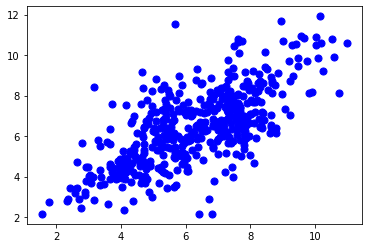

In [9]:
plt.scatter(df['affinity_x'],df['affinity_y'],marker='o',c='blue',s=50)

In [12]:
df[['affinity_x','affinity_y']].corr()    ###R

,affinity_x,affinity_y
affinity_x,1.000000,0.794588
affinity_y,0.794588,1.000000


In [13]:
np.sqrt(np.mean((df['affinity_x']-df['affinity_y'])**2))    ###rmse

1.4518194791042518

In [14]:
np.mean(np.abs(df['affinity_x']-df['affinity_y']))    ###mae

1.113935514018692

In [15]:
regr=linear_model.LinearRegression()
x=df['affinity_x'].values.reshape(-1,1)
y=df['affinity_y'].values.reshape(-1,1)

In [16]:
regr.fit( x  ,  y  )

LinearRegression()

In [17]:
y_ = regr.predict(x)

In [63]:
scipy.stats.pearsonr(df['affinity_x'].values,df['affinity_y'].values)

(0.7945883503958471, 1.713171212923187e-24)

In [18]:
np.sqrt(sum((y-y_)**2)/106)    ###SD

array([1.4165101])

In [26]:
core_dirs = glob(os.path.join('CASF-2013','CASF-2013','coreset','*'))
core_dirs.sort()
core_id = [os.path.split(i)[-1] for i in core_dirs]

In [ ]:
train_dirs = glob(os.path.join('trainset','*'))
train_dirs.sort()
train_id = [os.path.split(i)[-1] for i in train_dirs]

## csaf2016

In [19]:
df=pd.read_csv('../2016_x_y.csv')

In [20]:
df

,pdbid,affinity_x,affinity_y
0,1a30,5.4721,4.30
1,1bcu,4.0425,3.28
2,1bzc,5.8201,4.92
3,1c5z,3.9116,4.01
4,1e66,7.5716,9.89
...,...,...,...
280,5aba,4.1278,2.98
281,5c28,5.1121,5.66
282,5c2h,8.3963,11.09
283,5dwr,9.2049,11.22


In [21]:
df[['affinity_x','affinity_y']].corr()    ###R

,affinity_x,affinity_y
affinity_x,1.000000,0.792789
affinity_y,0.792789,1.000000


In [22]:
np.sqrt(np.mean((df['affinity_x']-df['affinity_y'])**2))    ###rmse

1.3262567334485227

In [23]:
np.mean(np.abs(df['affinity_x']-df['affinity_y']))    ###mae

1.027727719298246

In [24]:
regr=linear_model.LinearRegression()
x=df['affinity_x'].values.reshape(-1,1)
y=df['affinity_y'].values.reshape(-1,1)

In [25]:
regr.fit( x  ,  y  )

LinearRegression()

In [26]:
y_ = regr.predict(x)

In [27]:
np.sqrt(sum((y-y_)**2)/284)    ###SD

array([1.32525068])